In [40]:
from blockchain import exchangerates
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
tk = exchangerates.get_ticker()
print('1 bitcoin =', tk['KRW'].p15min, 'KRW')

1 bitcoin = 49011179.04 KRW


In [10]:
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04') # 005930.KS -> 삼성전자
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04') # Microsoft

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [12]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-11-06,353.450012,357.540009,353.350006,356.529999,356.529999
2023-11-07,359.399994,362.459991,357.630005,360.529999,360.529999
2023-11-08,361.679993,363.869995,360.549988,363.200012,363.200012
2023-11-09,362.299988,364.790009,360.359985,360.690002,360.690002
2023-11-10,361.489990,370.100006,361.070007,369.670013,369.670013


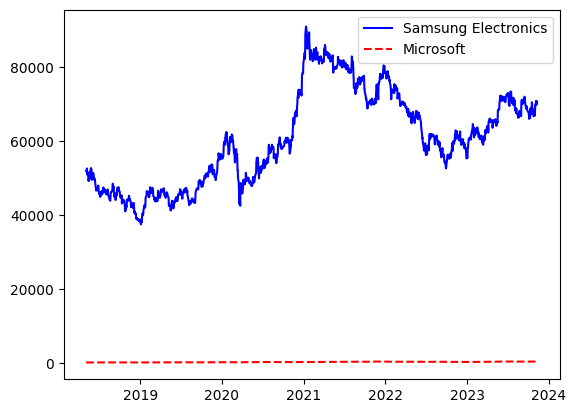

In [16]:
# 원, 달러 단위차이로 인해 그래프가 제대로 나타나지 않음 -> 일간변동률로 나타내기
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

### 일간 변동률
- 오늘변동률 = (오늘 종가 - 어제 종가) / 어제종가 * 100

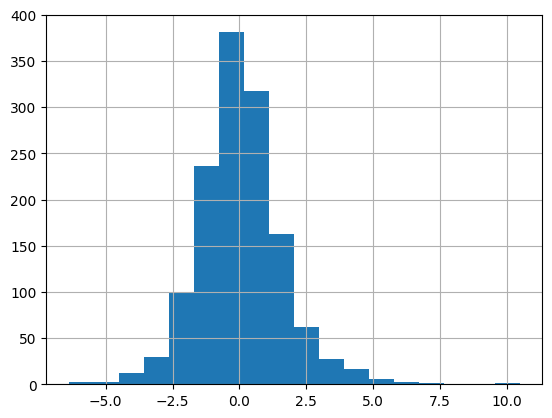

In [22]:
# 삼성 주가 일간 변동률 히스토그램
sec_dpc = (sec['Close'] /  sec['Close'].shift(1) - 1) * 100
sec_dpc.iloc[0] = 0

plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [23]:
sec_dpc.describe()

count    1358.000000
mean        0.035038
std         1.584450
min        -6.387665
25%        -0.975016
50%         0.000000
75%         0.840336
max        10.470588
Name: Close, dtype: float64

### 일간변동률 누적곱

In [24]:
sec_dpc_cp = ((100 + sec_dpc)/100).cumprod() * 100 - 100
sec_dpc_cp  # 2018-05-04 에 비해 마지막 날이 35.838150 % 이익을 기록함

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.926782
2018-05-10    -0.578035
2018-05-11    -1.156069
                ...    
2023-11-06    36.608863
2023-11-07    36.608863
2023-11-08    34.682081
2023-11-09    35.452794
2023-11-10    35.838150
Name: Close, Length: 1358, dtype: float64

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


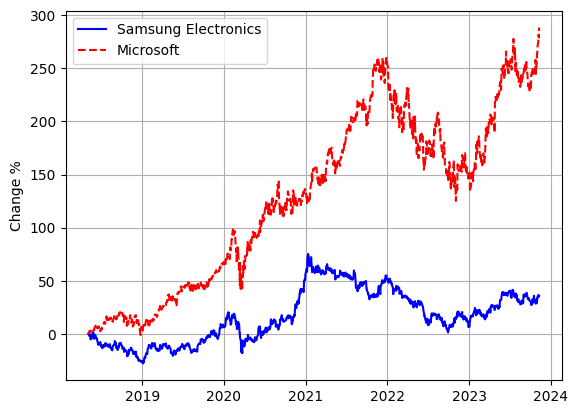

In [27]:
# 주식수익률 비교
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04') # 005930.KS -> 삼성전자
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.iloc[0] = 0
sec_dpc_cp = ((100 + sec_dpc)/100).cumprod() * 100 - 100 # 일간변동률이 0인 경우 누적곱도 0이 되므로 이를 방지하기 위해 100을 더하고 나중에 뺌

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04') # Microsoft
msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cp = ((100 + msft_dpc)/100).cumprod() * 100 - 100

plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cp, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

### 최대 손실 낙폭 (Maximum Drawdown)
- MDD = (최저점 - 최고점) / 최고점

[*********************100%%**********************]  1 of 1 completed


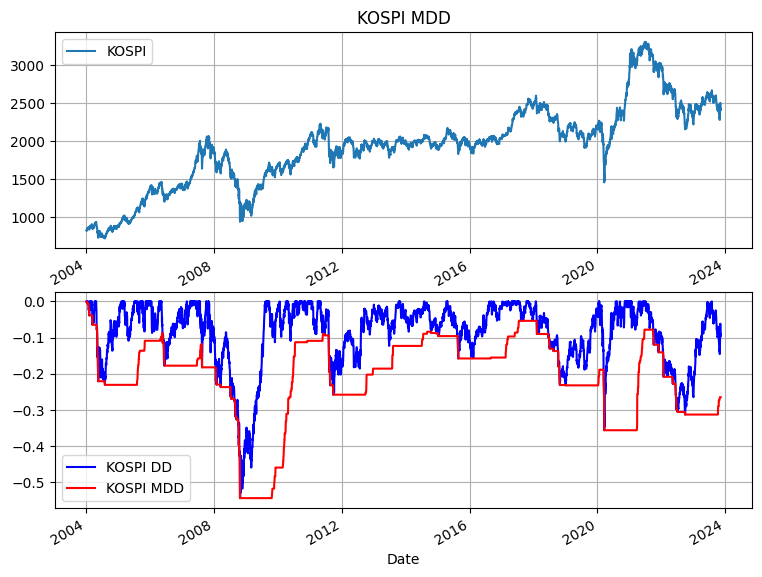

In [30]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04') # kospi 지수 데이터 다운

window = 252 # 1년동안의 개장일을 어림잡아 설정
peak = kospi['Adj Close'].rolling(window, min_periods=1).max() # 기간단위로 최고치 peak
drawdown = kospi['Adj Close'] / peak - 1.0 # peak 대비 현재 KOSPI 종가가 얼마나 하락했는지
max_dd = drawdown.rolling(window, min_periods=1).min() # 기간단위로 최저치 max_dd (최저치가 최대손실낙폭)

plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [31]:
max_dd.min()

-0.5453665130144085

In [32]:
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

### 회귀분석과 상관관계

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


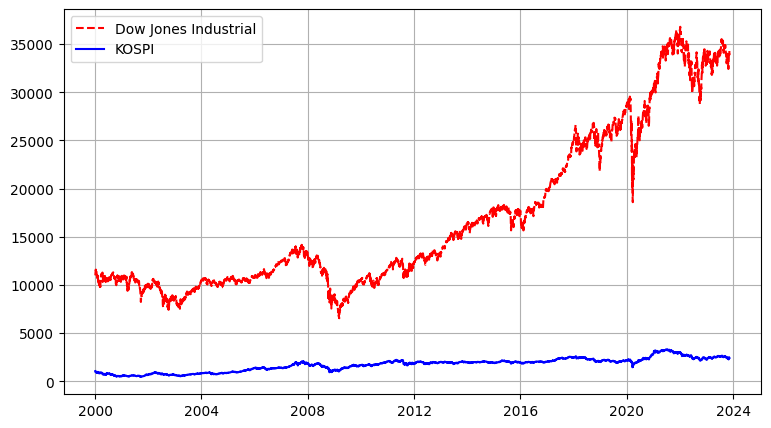

In [34]:
# KOSPI와 다우존스 지수 비교
dow = pdr.get_data_yahoo('^DJI', '2000-01-04') # 다우존스 지수(미국)
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04') # kospi 지수(한국)

plt.figure(figsize=(9, 5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show() # 단위가 달라서 비교 힘듦

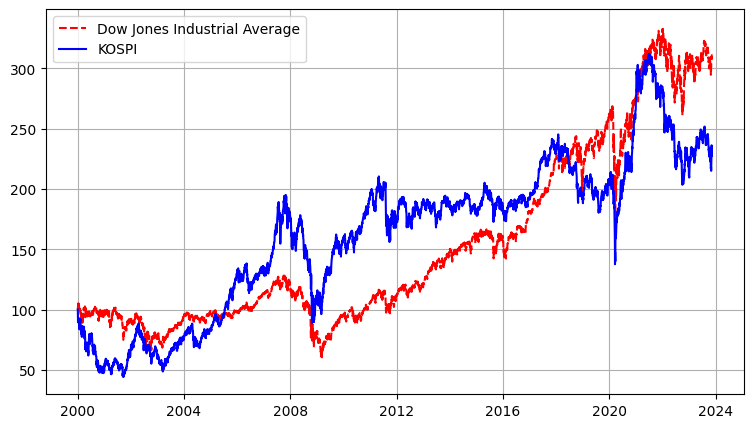

In [36]:
# 변동률 비교
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100 # 금일지수를 2000-01-04에서의 지수로 나눈뒤 100 곱
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100 # 금일지수를 2000-01-04에서의 지수로 나눈뒤 100 곱

plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [39]:
# 산점도 분석
len(dow), len(kospi) # 개수를 맞춰야 상관관계 분석 가능

(6003, 5884)

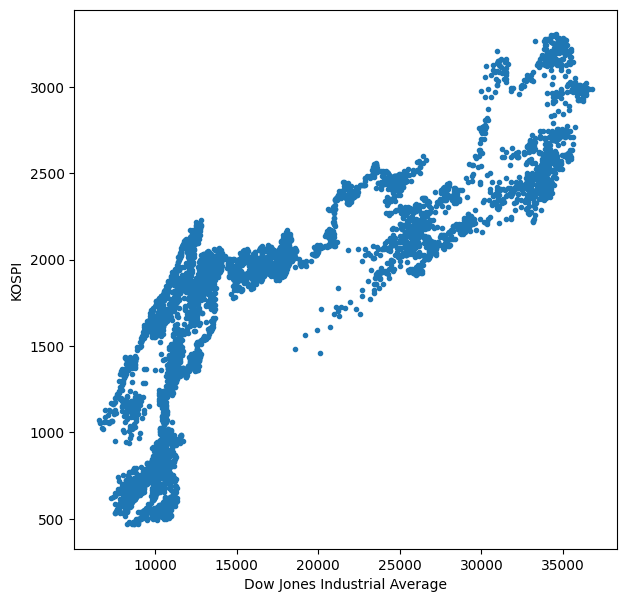

In [42]:
df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI':kospi['Close']})

df = df.fillna(method='bfill')
df = df.fillna(method='ffill') # 마지막행이 nan인 경우를 위해

plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [43]:
# 선형 회귀분석
from scipy import stats

regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.0675053150729063, intercept=577.9901580512501, rvalue=0.8243867297466722, pvalue=0.0, stderr=0.0005893512945838004, intercept_stderr=11.090828633449723)

### 상관계수에 따른 리스크 완화

In [44]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.824387
KOSPI,0.824387,1.000000


In [45]:
df['DOW'].corr(df['KOSPI'])

0.8243867297466719

In [46]:
# 결정계수 구하기 (R-squared)
r_value = df['DOW'].corr(df['KOSPI'])
r_squared = r_value ** 2
r_squared # 1에 가까울수록 관측치가 추정된 회귀선 위에 있다. 0이면 전혀 설명하지 못함.

0.6796134801824123

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


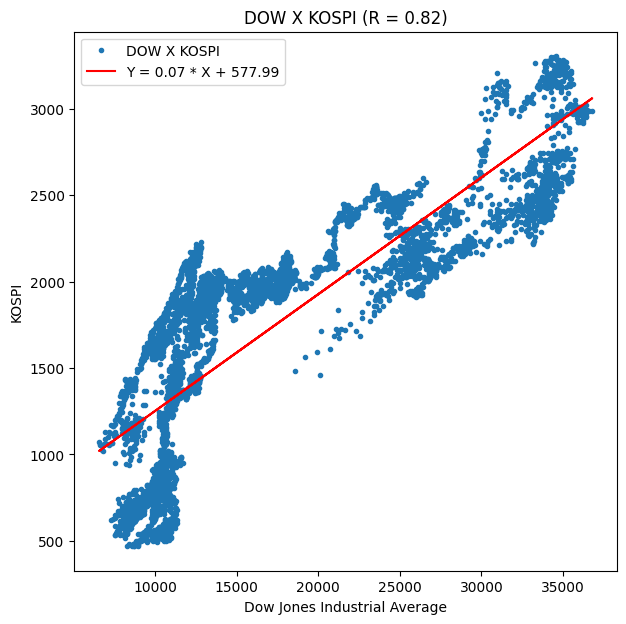

In [4]:
# 다우존스 지수와 KOSPI 회귀분석
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}' # 범례에 회귀식 표시

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW X KOSPI', regr_line])
plt.title(f'DOW X KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


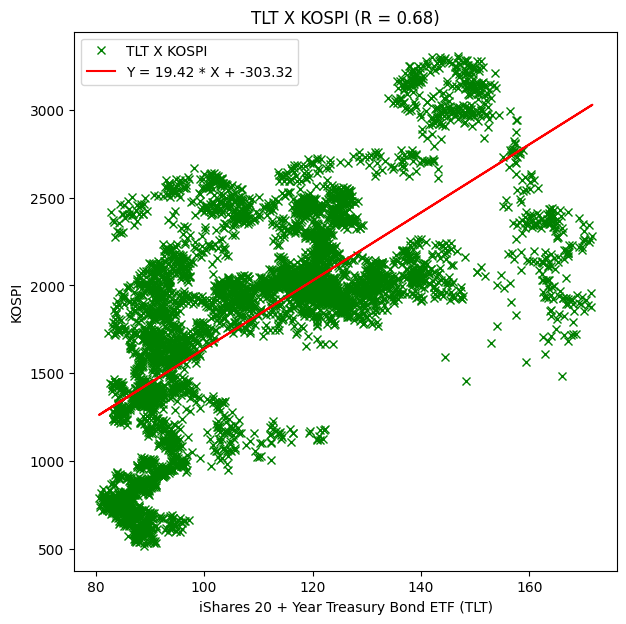

In [7]:
# 미국 국채와 KOSPI 회귀분석
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

TLT = pdr.get_data_yahoo('TLT', '2002-07-30') # 미국 국채
kospi = pdr.get_data_yahoo('^KS11', '2002-07-30')

df = pd.DataFrame({'X':TLT['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}' # 범례에 회귀식 표시

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, 'x', c='g')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['TLT X KOSPI', regr_line])
plt.title(f'TLT X KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('iShares 20 + Year Treasury Bond ETF (TLT)')
plt.ylabel('KOSPI')
plt.show() # R-squared 값이 미국국채와의 값이 더 낮으므로 국내주식에 투자하고있다면 다우존스지수보다 미국채권에 투자하는 것이 리스크 완화